## 第一步.导入数据

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import visuals as vs

%matplotlib inline

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
!pip install xgboost

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import xgboost as xgb

In [4]:
types = {'CompetitionOpenSinceYear': np.dtype(int),
         'CompetitionOpenSinceMonth': np.dtype(int),
         'StateHoliday': np.dtype(str),
         'Promo2SinceWeek': np.dtype(int),
         'SchoolHoliday': np.dtype(int),
         'PromoInterval': np.dtype(str)}

In [5]:
train = pd.read_csv('train.csv',parse_dates=[2],dtype=types)
test = pd.read_csv('test.csv',parse_dates=[3],dtype=types)

In [6]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [8]:
store=pd.read_csv('store.csv')

In [9]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 第二步. 分析数据

### 1.	数据探索，包括计算最大小值，中位数等等，获得基础的统计信息；

In [10]:
#train数据的缺失值统计
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [11]:
#test数据的缺失值统计
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [12]:
#store数据的缺失值统计
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [13]:
Sales = train['Sales']
minimum_sales = Sales.min()
maximum_sales = Sales.max()
mean_sales = Sales.mean()
median_price = Sales.median()
std_Sales = np.std(Sales)

print("Statistics for Boston housing dataset:\n")
print("Minimum sales: ${:,.2f}".format(minimum_sales))
print("Maximum sales: ${:,.2f}".format(maximum_sales)) 
print("Mean sales: ${:,.2f}".format(mean_sales)) 
print("Median sales ${:,.2f}".format(median_price)) 
print("Standard deviation of sales: ${:,.2f}".format(std_Sales)) 


Statistics for Boston housing dataset:

Minimum sales: $0.00
Maximum sales: $41,551.00
Mean sales: $5,773.82
Median sales $5,744.00
Standard deviation of sales: $3,849.92


In [14]:
#筛选开门和销售额大于0的数据
#"Consider only open stores for training. Closed stores wont count into the score."
train = train[train["Open"] != 0]
#"Use only Sales bigger then zero"
train = train[train["Sales"] > 0]

In [15]:
#筛选之后的数据
Sales = train['Sales']
minimum_sales = Sales.min()
maximum_sales = Sales.max()
mean_sales = Sales.mean()
median_price = Sales.median()
std_Sales = np.std(Sales)

print("Statistics for Boston housing dataset:\n")
print("Minimum sales: ${:,.2f}".format(minimum_sales))
print("Maximum sales: ${:,.2f}".format(maximum_sales)) 
print("Mean sales: ${:,.2f}".format(mean_sales)) 
print("Median sales ${:,.2f}".format(median_price)) 
print("Standard deviation of sales: ${:,.2f}".format(std_Sales)) 


Statistics for Boston housing dataset:

Minimum sales: $46.00
Maximum sales: $41,551.00
Mean sales: $6,955.96
Median sales $6,369.00
Standard deviation of sales: $3,103.81


In [16]:
#计算每个商店每个客户的平均消费金额
train['Sales_Per_Customer']=train['Sales']/train['Customers']
train['Sales_Per_Customer'].head(10)

0     9.482883
1     9.702400
2    10.126675
3     9.342457
4     8.626118
5     9.594228
6    10.851485
7    10.194478
8    12.467249
9    10.550661
Name: Sales_Per_Customer, dtype: float64

### 2.预处理，包括归一化、剔除异常值（包括很多门店没有营业的状况），独热编码等；


In [17]:
print("Assume store open, if not provided")
test.fillna(1, inplace=True)

Assume store open, if not provided


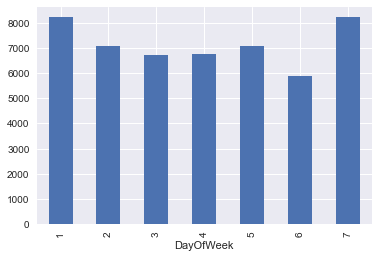

In [18]:
#一周中星期对平均销售额的影响探讨
a=train['Sales'].groupby(train['DayOfWeek']).mean()
a.plot(kind='bar')


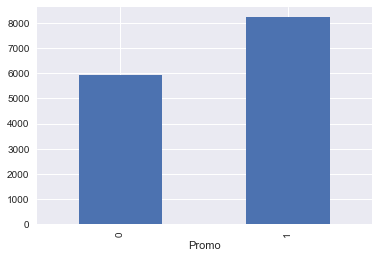

In [19]:
#是否促销对平均销售额的影响
d=train['Sales'].groupby(train['Promo']).mean()
d.plot(kind='bar')

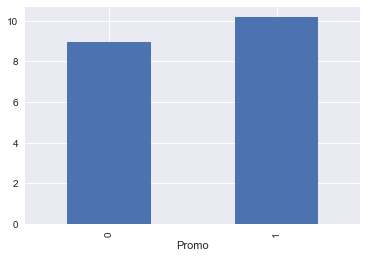

In [20]:
d1=train['Sales_Per_Customer'].groupby(train['Promo']).mean()
d1.plot(kind='bar')

In [21]:
#设置数据集中需要进行转化的映射字典
maps={'0':0,'a':1,'b':2,'c':3,'d':4}

In [22]:
#解析时间序列
def Date_processing(data):
    data.StateHoliday.replace(maps, inplace=True)
    
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['WeekOfYear'] = data.Date.dt.weekofyear
    data.drop(['Date'],axis=1,inplace=True)
    return data

train=Date_processing(train)
test = Date_processing(test)

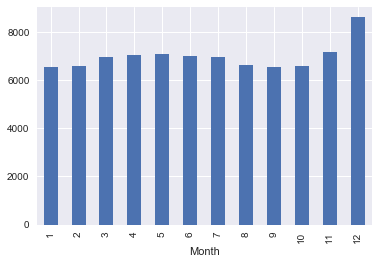

In [23]:
#不同月份对平均销售额的影响探讨
b=train['Sales'].groupby(train['Month']).mean()
b.plot(kind='bar')

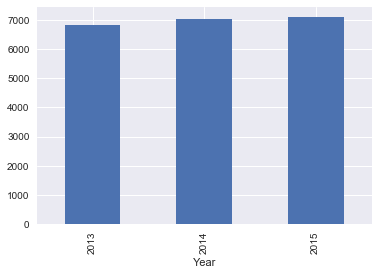

In [24]:
#不同年份对平均销售额的影响探讨
b=train['Sales'].groupby(train['Year']).mean()
b.plot(kind='bar')

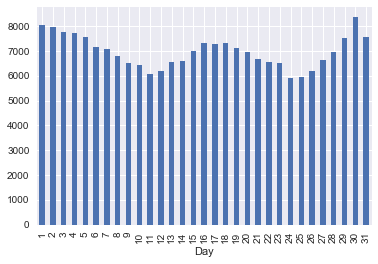

In [25]:
#不同day对平均销售额的影响探讨
b=train['Sales'].groupby(train['Day']).mean()
b.plot(kind='bar')

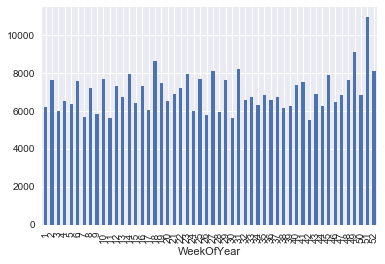

In [26]:
#不同星期对平均销售额的影响探讨
b=train['Sales'].groupby(train['WeekOfYear']).mean()
b.plot(kind='bar')

In [27]:
store.Assortment.replace(maps, inplace=True)
store.StoreType.replace(maps, inplace=True)

In [28]:
#对缺失值填充，于CompetitionDistance的缺失值用中位数填充，其余用0填充
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)
store['CompetitionOpenSinceYear'].fillna(method='ffill', inplace = True)
store['CompetitionOpenSinceMonth'].fillna(method='ffill', inplace = True)
store.fillna(0, inplace = True)

In [29]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,1,1,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,3,3,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,1,1,29910.0,4.0,2015.0,0,0.0,0.0,0


In [30]:
a = train.groupby('Store')['Sales_Per_Customer'].apply(lambda x: np.mean(x))
b  = pd.DataFrame({'Store':a.index, 'Sales_Per_Customer_Store':a.values})
store = pd.merge(store, b, on='Store')

In [31]:
print("Join with store")
train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')

Join with store


In [32]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales_Per_Customer_Store
0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,8.393038
1,2,1,1,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",8.408443
2,3,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",9.117599
3,4,3,3,620.0,9.0,2009.0,0,0.0,0.0,0,7.249827
4,5,1,1,29910.0,4.0,2015.0,0,0.0,0.0,0,8.611229


In [33]:
train.head().T

,0,1,2,3,4
Store,1,1,1,1,1
DayOfWeek,5,4,3,2,1
Sales,5263,5020,4782,5011,6102
Customers,555,546,523,560,612
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
Sales_Per_Customer,9.48288,9.19414,9.1434,8.94821,9.97059
Year,2015,2015,2015,2015,2015


In [34]:
test.head().T

,0,1,2,3,4
Id,1,857,1713,2569,3425
Store,1,1,1,1,1
DayOfWeek,4,3,2,1,7
Open,1,1,1,1,0
Promo,1,1,1,1,0
StateHoliday,0,0,0,0,0
SchoolHoliday,0,0,0,0,0
Year,2015,2015,2015,2015,2015
Month,9,9,9,9,9
Day,17,16,15,14,13


In [35]:
train.shape

(844338, 23)

In [36]:
test.shape

(41088, 21)

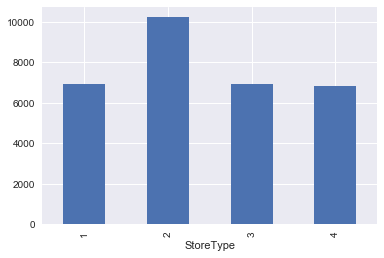

In [37]:
#不同门店对平均销售额的影响探讨
c=train['Sales'].groupby(train['StoreType']).mean()
c.plot(kind='bar')

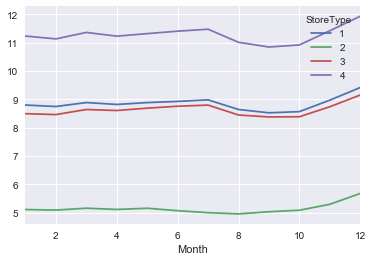

In [38]:
#不同星期对平均销售额的影响探讨
d=train['Sales_Per_Customer'].groupby([train['Month'],train['StoreType']]).mean().unstack()
d.plot()

### 3.进行特征工程；

In [39]:
#对于StoreType和Assrotment进行独热编码
def dummies_feature(data):
    dummies_store=pd.get_dummies(data['StoreType'],prefix='StoreType')
    dummies_assortment=pd.get_dummies(data['Assortment'],prefix='Assortment')
    dummies_StateHoliday=pd.get_dummies(data['StateHoliday'],prefix='StateHoliday')
    data=data.join([dummies_store])
    data=data.join([dummies_assortment])
    data=data.join([dummies_StateHoliday])
    #dummies_Day=pd.get_dummies(data['Day'],prefix='Day')
    #data=data.join([dummies_Day])
    data.drop(['StoreType','Assortment','StateHoliday'],axis=1,inplace=True)
    return data
train=dummies_feature(train)
test=dummies_feature(test)

test['StateHoliday_2']=0
test['StateHoliday_3']=0

In [40]:
train.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Store,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DayOfWeek,5,4,3,2,1,6,5,4,3,2,...,3,2,1,6,5,4,3,2,1,6
Sales,5263,5020,4782,5011,6102,4364,3706,3769,3464,3558,...,3797,3650,4359,4797,4665,5558,5223,5735,5197,4019
Customers,555,546,523,560,612,500,459,503,463,469,...,485,485,540,560,538,573,562,568,541,463
Open,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Promo,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,0
SchoolHoliday,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sales_Per_Customer,9.48288,9.19414,9.1434,8.94821,9.97059,8.728,8.07407,7.49304,7.48164,7.58635,...,7.82887,7.52577,8.07222,8.56607,8.671,9.69983,9.29359,10.0968,9.60628,8.68035
Year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
Month,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,6,6,6


In [41]:
test.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Id,1,857,1713,2569,3425,4281,5137,5993,6849,7705,...,17121,17977,18833,19689,20545,21401,22257,23113,23969,24825
Store,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DayOfWeek,4,3,2,1,7,6,5,4,3,2,...,5,4,3,2,1,7,6,5,4,3
Open,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Promo,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
SchoolHoliday,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
Month,9,9,9,9,9,9,9,9,9,9,...,8,8,8,8,8,8,8,8,8,8
Day,17,16,15,14,13,12,11,10,9,8,...,28,27,26,25,24,23,22,21,20,19
WeekOfYear,38,38,38,38,37,37,37,37,37,37,...,35,35,35,35,35,34,34,34,34,34


### ！等到打通模型之后，测试一下把时间进行独热编码

In [42]:
#Calculate time competition open time in months
PIU=store['PromoInterval'].unique()
PIU=np.delete(PIU,0,axis=0)

def newfeature(data):
    # CompetionOpen time
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) + \
        (data.Month - data.CompetitionOpenSinceMonth)
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
    
    # Promo2 open time in months
    data['Promo2Open'] = 12 * (data.Year - data.Promo2SinceYear) + \
        (data.WeekOfYear - data.Promo2SinceWeek) / 4
    data['Promo2Open'] = data.Promo2Open.apply(lambda x: x if x > 0 else 0)
    data.loc[data['Promo2SinceYear']==0,'Promo2Open']=0
    
    # Indicate that sales on that day are in promo interval
    maps = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', \
             7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data['Month'].replace(maps)
    data['IsPromoMonth'] = 0
    for Interval in PIU:
        for month in Interval.split(','):
            data.loc[(data['monthStr']== month) & (data['PromoInterval']==Interval), 'IsPromoMonth'] = 1
    data.drop(['PromoInterval','monthStr'],inplace=True,axis=1)
    return data

In [43]:
train = newfeature(train)
test = newfeature(test)

In [44]:
train['CompetitionDistance'] = train['CompetitionDistance'].apply(lambda x: np.log(x + 1))
test['CompetitionDistance'] = test['CompetitionDistance'].apply(lambda x: np.log(x + 1))

train['CompetitionOpen'] = train['CompetitionOpen'].apply(lambda x: np.log(x + 1))
test['CompetitionOpen'] = test['CompetitionOpen'].apply(lambda x: np.log(x + 1))

train['Promo2Open'] = train['Promo2Open'].apply(lambda x: np.log(x + 1))
test['Promo2Open'] = test['Promo2Open'].apply(lambda x: np.log(x + 1))

In [45]:
#对competition distance 进行归一化
from sklearn.preprocessing import MinMaxScaler

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
train['CompetitionDistance'] = scaler.fit_transform(train['CompetitionDistance'])
test['CompetitionDistance'] = scaler.fit_transform(test['CompetitionDistance'])

train['CompetitionOpen'] = scaler.fit_transform(train['CompetitionOpen'])
test['CompetitionOpen'] = scaler.fit_transform(test['CompetitionOpen'])

train['Promo2Open'] = scaler.fit_transform(train['Promo2Open'])
test['Promo2Open'] = scaler.fit_transform(test['Promo2Open'])

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.resha

### 4.对训练集数据进行切分，按照时间顺序，前面的数据用于训练，最后六周数据用于验证；

In [46]:
#把列名进行排序，确保train和test的列顺序一致
train=train.sort_index(axis=1)
test=test.sort_index(axis=1)

In [47]:
train.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Assortment_1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Assortment_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Assortment_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CompetitionDistance,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,...,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851
CompetitionOpen,0.610767,0.610767,0.610767,0.610767,0.610767,0.610767,0.610767,0.610767,0.610767,0.610767,...,0.610767,0.610767,0.610767,0.610767,0.610767,0.610767,0.610767,0.609092,0.609092,0.609092
CompetitionOpenSinceMonth,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
CompetitionOpenSinceYear,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,...,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000
Customers,555.000000,546.000000,523.000000,560.000000,612.000000,500.000000,459.000000,503.000000,463.000000,469.000000,...,485.000000,485.000000,540.000000,560.000000,538.000000,573.000000,562.000000,568.000000,541.000000,463.000000
Day,31.000000,30.000000,29.000000,28.000000,27.000000,25.000000,24.000000,23.000000,22.000000,21.000000,...,8.000000,7.000000,6.000000,4.000000,3.000000,2.000000,1.000000,30.000000,29.000000,27.000000
DayOfWeek,5.000000,4.000000,3.000000,2.000000,1.000000,6.000000,5.000000,4.000000,3.000000,2.000000,...,3.000000,2.000000,1.000000,6.000000,5.000000,4.000000,3.000000,2.000000,1.000000,6.000000


In [48]:
test.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Assortment_1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Assortment_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Assortment_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CompetitionDistance,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,...,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851
CompetitionOpen,0.613936,0.613936,0.613936,0.613936,0.613936,0.613936,0.613936,0.613936,0.613936,0.613936,...,0.612301,0.612301,0.612301,0.612301,0.612301,0.612301,0.612301,0.612301,0.612301,0.612301
CompetitionOpenSinceMonth,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
CompetitionOpenSinceYear,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,...,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000
Day,17.000000,16.000000,15.000000,14.000000,13.000000,12.000000,11.000000,10.000000,9.000000,8.000000,...,28.000000,27.000000,26.000000,25.000000,24.000000,23.000000,22.000000,21.000000,20.000000,19.000000
DayOfWeek,4.000000,3.000000,2.000000,1.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,...,5.000000,4.000000,3.000000,2.000000,1.000000,7.000000,6.000000,5.000000,4.000000,3.000000
Id,1.000000,857.000000,1713.000000,2569.000000,3425.000000,4281.000000,5137.000000,5993.000000,6849.000000,7705.000000,...,17121.000000,17977.000000,18833.000000,19689.000000,20545.000000,21401.000000,22257.000000,23113.000000,23969.000000,24825.000000


In [49]:
#观察训练集最后六周是哪六周
train.loc[train['Year']==2015,'WeekOfYear'].unique()

array([31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [50]:
train['LastSixWeek']=0

for week in range(26,32):
    train.loc[(train['Year']==2015)&(train['WeekOfYear']==week),'LastSixWeek']=1


data1=train[train['LastSixWeek']==0]
X_train=data1.drop(['Sales','Customers','Sales_Per_Customer','LastSixWeek'],axis=1)
Y_train=np.log1p(data1['Sales'])

data2=train[train['LastSixWeek']==1]
X_valid=data2.drop(['Sales','Customers','Sales_Per_Customer','LastSixWeek'],axis=1)
Y_valid=np.log1p(data2['Sales'])


In [51]:
X_train.head(30).T

,35,36,37,38,39,40,41,42,43,44,...,55,56,57,58,59,60,61,62,63,64
Assortment_1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Assortment_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Assortment_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CompetitionDistance,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,...,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851
CompetitionOpen,0.609092,0.609092,0.609092,0.609092,0.609092,0.609092,0.609092,0.609092,0.609092,0.609092,...,0.607396,0.607396,0.607396,0.607396,0.607396,0.607396,0.607396,0.607396,0.607396,0.607396
CompetitionOpenSinceMonth,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
CompetitionOpenSinceYear,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,...,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000
Day,20.000000,19.000000,18.000000,17.000000,16.000000,15.000000,13.000000,12.000000,11.000000,10.000000,...,27.000000,26.000000,23.000000,22.000000,21.000000,20.000000,19.000000,18.000000,16.000000,15.000000
DayOfWeek,6.000000,5.000000,4.000000,3.000000,2.000000,1.000000,6.000000,5.000000,4.000000,3.000000,...,3.000000,2.000000,6.000000,5.000000,4.000000,3.000000,2.000000,1.000000,6.000000,5.000000
IsPromoMonth,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
train['IsPromoMonth'].head(1000).sum()

77

In [53]:
test.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Assortment_1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Assortment_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Assortment_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CompetitionDistance,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,...,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851,0.500851
CompetitionOpen,0.613936,0.613936,0.613936,0.613936,0.613936,0.613936,0.613936,0.613936,0.613936,0.613936,...,0.612301,0.612301,0.612301,0.612301,0.612301,0.612301,0.612301,0.612301,0.612301,0.612301
CompetitionOpenSinceMonth,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
CompetitionOpenSinceYear,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,...,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000
Day,17.000000,16.000000,15.000000,14.000000,13.000000,12.000000,11.000000,10.000000,9.000000,8.000000,...,28.000000,27.000000,26.000000,25.000000,24.000000,23.000000,22.000000,21.000000,20.000000,19.000000
DayOfWeek,4.000000,3.000000,2.000000,1.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,...,5.000000,4.000000,3.000000,2.000000,1.000000,7.000000,6.000000,5.000000,4.000000,3.000000
Id,1.000000,857.000000,1713.000000,2569.000000,3425.000000,4281.000000,5137.000000,5993.000000,6849.000000,7705.000000,...,17121.000000,17977.000000,18833.000000,19689.000000,20545.000000,21401.000000,22257.000000,23113.000000,23969.000000,24825.000000


### 5.快速用XGBoost建模，并预测验证集结果，得到RMSPE；

In [54]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

def rmspe_xg(yhat, y):
    y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe

In [55]:
print("Train xgboost model")

params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.05,
          "max_depth": 10,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "min_child_weight": 6,
          "silent": 1,
          "thread": 1,
          "seed": 1301
          }
num_boost_round = 3000

Train xgboost model


In [56]:
dtrain = xgb.DMatrix(X_train, Y_train)
dvalid = xgb.DMatrix(X_valid, Y_valid)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

In [57]:
gbm = xgb.train(params, dtrain, num_boost_round ,evals=watchlist, early_stopping_rounds=50, \
  feval=rmspe_xg, verbose_eval=True)

[0]	train-rmse:7.85542	eval-rmse:7.86961	train-rmspe:0.999744	eval-rmspe:0.99975
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 50 rounds.
[1]	train-rmse:7.46342	eval-rmse:7.47812	train-rmspe:0.99954	eval-rmspe:0.99955
[2]	train-rmse:7.09107	eval-rmse:7.10614	train-rmspe:0.999257	eval-rmspe:0.999274
[3]	train-rmse:6.73732	eval-rmse:6.75232	train-rmspe:0.998873	eval-rmspe:0.998898
[4]	train-rmse:6.40134	eval-rmse:6.4172	train-rmspe:0.998358	eval-rmspe:0.998395
[5]	train-rmse:6.08217	eval-rmse:6.09815	train-rmspe:0.997681	eval-rmspe:0.997733
[6]	train-rmse:5.77907	eval-rmse:5.79526	train-rmspe:0.996803	eval-rmspe:0.996875
[7]	train-rmse:5.49101	eval-rmse:5.50798	train-rmspe:0.995689	eval-rmspe:0.995789
[8]	train-rmse:5.21738	eval-rmse:5.23499	train-rmspe:0.994291	eval-rmspe:0.994426
[9]	train-rmse:4.95752	eval-rmse:4.97546	train-rmspe:0.992558	eval-rmspe:0.992736
[10]	train-rmse:4.71067	eval-rmse:4.728

[97]	train-rmse:0.205207	eval-rmse:0.215517	train-rmspe:0.242037	eval-rmspe:0.210226
[98]	train-rmse:0.204089	eval-rmse:0.214529	train-rmspe:0.241989	eval-rmspe:0.210068
[99]	train-rmse:0.203085	eval-rmse:0.213474	train-rmspe:0.241982	eval-rmspe:0.209715
[100]	train-rmse:0.201716	eval-rmse:0.212142	train-rmspe:0.241754	eval-rmspe:0.209131
[101]	train-rmse:0.200085	eval-rmse:0.21054	train-rmspe:0.241203	eval-rmspe:0.208227
[102]	train-rmse:0.199041	eval-rmse:0.20861	train-rmspe:0.241031	eval-rmspe:0.207145
[103]	train-rmse:0.197783	eval-rmse:0.207371	train-rmspe:0.240645	eval-rmspe:0.206539
[104]	train-rmse:0.196944	eval-rmse:0.206413	train-rmspe:0.240527	eval-rmspe:0.206255
[105]	train-rmse:0.195966	eval-rmse:0.205443	train-rmspe:0.239395	eval-rmspe:0.205878
[106]	train-rmse:0.194588	eval-rmse:0.204052	train-rmspe:0.238702	eval-rmspe:0.205009
[107]	train-rmse:0.193048	eval-rmse:0.20251	train-rmspe:0.237993	eval-rmspe:0.203951
[108]	train-rmse:0.191761	eval-rmse:0.201856	train-rmspe:0.2

[193]	train-rmse:0.140039	eval-rmse:0.154895	train-rmspe:0.193587	eval-rmspe:0.163922
[194]	train-rmse:0.139443	eval-rmse:0.154366	train-rmspe:0.193001	eval-rmspe:0.163351
[195]	train-rmse:0.139205	eval-rmse:0.154147	train-rmspe:0.192817	eval-rmspe:0.163125
[196]	train-rmse:0.13892	eval-rmse:0.154137	train-rmspe:0.192562	eval-rmspe:0.163097
[197]	train-rmse:0.138713	eval-rmse:0.154162	train-rmspe:0.192309	eval-rmspe:0.163287
[198]	train-rmse:0.138166	eval-rmse:0.153622	train-rmspe:0.191923	eval-rmspe:0.162733
[199]	train-rmse:0.138077	eval-rmse:0.153489	train-rmspe:0.19172	eval-rmspe:0.162544
[200]	train-rmse:0.137812	eval-rmse:0.153263	train-rmspe:0.191814	eval-rmspe:0.162329
[201]	train-rmse:0.137525	eval-rmse:0.153002	train-rmspe:0.19159	eval-rmspe:0.162053
[202]	train-rmse:0.137082	eval-rmse:0.152584	train-rmspe:0.19147	eval-rmspe:0.161633
[203]	train-rmse:0.136621	eval-rmse:0.152118	train-rmspe:0.191112	eval-rmspe:0.161178
[204]	train-rmse:0.136479	eval-rmse:0.151993	train-rmspe:0

[289]	train-rmse:0.115059	eval-rmse:0.134318	train-rmspe:0.168645	eval-rmspe:0.142361
[290]	train-rmse:0.114751	eval-rmse:0.134043	train-rmspe:0.168379	eval-rmspe:0.142031
[291]	train-rmse:0.114519	eval-rmse:0.133843	train-rmspe:0.168043	eval-rmspe:0.141832
[292]	train-rmse:0.114393	eval-rmse:0.133688	train-rmspe:0.167953	eval-rmspe:0.141664
[293]	train-rmse:0.114164	eval-rmse:0.133578	train-rmspe:0.167814	eval-rmspe:0.141519
[294]	train-rmse:0.113947	eval-rmse:0.133412	train-rmspe:0.167644	eval-rmspe:0.141324
[295]	train-rmse:0.113718	eval-rmse:0.13323	train-rmspe:0.167392	eval-rmspe:0.141142
[296]	train-rmse:0.113584	eval-rmse:0.133085	train-rmspe:0.167294	eval-rmspe:0.140992
[297]	train-rmse:0.113503	eval-rmse:0.132977	train-rmspe:0.167227	eval-rmspe:0.140882
[298]	train-rmse:0.113399	eval-rmse:0.132871	train-rmspe:0.166441	eval-rmspe:0.140773
[299]	train-rmse:0.11315	eval-rmse:0.132663	train-rmspe:0.166151	eval-rmspe:0.140561
[300]	train-rmse:0.113058	eval-rmse:0.132578	train-rmspe

[385]	train-rmse:0.102984	eval-rmse:0.124726	train-rmspe:0.155375	eval-rmspe:0.132099
[386]	train-rmse:0.102894	eval-rmse:0.124683	train-rmspe:0.155305	eval-rmspe:0.132044
[387]	train-rmse:0.102804	eval-rmse:0.124614	train-rmspe:0.155264	eval-rmspe:0.131982
[388]	train-rmse:0.102746	eval-rmse:0.124587	train-rmspe:0.155225	eval-rmspe:0.131947
[389]	train-rmse:0.10267	eval-rmse:0.124515	train-rmspe:0.155173	eval-rmspe:0.131853
[390]	train-rmse:0.102585	eval-rmse:0.124498	train-rmspe:0.15467	eval-rmspe:0.13184
[391]	train-rmse:0.102423	eval-rmse:0.124411	train-rmspe:0.154534	eval-rmspe:0.131736
[392]	train-rmse:0.102265	eval-rmse:0.12432	train-rmspe:0.154388	eval-rmspe:0.131628
[393]	train-rmse:0.102227	eval-rmse:0.124292	train-rmspe:0.15436	eval-rmspe:0.131588
[394]	train-rmse:0.102182	eval-rmse:0.124237	train-rmspe:0.154329	eval-rmspe:0.131527
[395]	train-rmse:0.102069	eval-rmse:0.124142	train-rmspe:0.154239	eval-rmspe:0.131409
[396]	train-rmse:0.10203	eval-rmse:0.124108	train-rmspe:0.1

[481]	train-rmse:0.096024	eval-rmse:0.119835	train-rmspe:0.146403	eval-rmspe:0.126919
[482]	train-rmse:0.095984	eval-rmse:0.119803	train-rmspe:0.146356	eval-rmspe:0.126898
[483]	train-rmse:0.095947	eval-rmse:0.119776	train-rmspe:0.14633	eval-rmspe:0.126864
[484]	train-rmse:0.095913	eval-rmse:0.119764	train-rmspe:0.146303	eval-rmspe:0.126857
[485]	train-rmse:0.095873	eval-rmse:0.119738	train-rmspe:0.146248	eval-rmspe:0.126833
[486]	train-rmse:0.095826	eval-rmse:0.119684	train-rmspe:0.146204	eval-rmspe:0.126763
[487]	train-rmse:0.095724	eval-rmse:0.119629	train-rmspe:0.146071	eval-rmspe:0.126698
[488]	train-rmse:0.095678	eval-rmse:0.119659	train-rmspe:0.14602	eval-rmspe:0.126714
[489]	train-rmse:0.095634	eval-rmse:0.119611	train-rmspe:0.145987	eval-rmspe:0.126654
[490]	train-rmse:0.09555	eval-rmse:0.119579	train-rmspe:0.145913	eval-rmspe:0.126631
[491]	train-rmse:0.095463	eval-rmse:0.119512	train-rmspe:0.145841	eval-rmspe:0.126534
[492]	train-rmse:0.09541	eval-rmse:0.119485	train-rmspe:0

[577]	train-rmse:0.091372	eval-rmse:0.117249	train-rmspe:0.138324	eval-rmspe:0.124014
[578]	train-rmse:0.091344	eval-rmse:0.117215	train-rmspe:0.138303	eval-rmspe:0.12397
[579]	train-rmse:0.091279	eval-rmse:0.117182	train-rmspe:0.138256	eval-rmspe:0.123943
[580]	train-rmse:0.091251	eval-rmse:0.117166	train-rmspe:0.138238	eval-rmspe:0.123927
[581]	train-rmse:0.091223	eval-rmse:0.117152	train-rmspe:0.138224	eval-rmspe:0.12391
[582]	train-rmse:0.091203	eval-rmse:0.117131	train-rmspe:0.138199	eval-rmspe:0.123883
[583]	train-rmse:0.09118	eval-rmse:0.117122	train-rmspe:0.138165	eval-rmspe:0.123881
[584]	train-rmse:0.091128	eval-rmse:0.117085	train-rmspe:0.138117	eval-rmspe:0.123842
[585]	train-rmse:0.091085	eval-rmse:0.117057	train-rmspe:0.138061	eval-rmspe:0.123812
[586]	train-rmse:0.09106	eval-rmse:0.117048	train-rmspe:0.13804	eval-rmspe:0.1238
[587]	train-rmse:0.091036	eval-rmse:0.117029	train-rmspe:0.138023	eval-rmspe:0.123781
[588]	train-rmse:0.090986	eval-rmse:0.116985	train-rmspe:0.13

[673]	train-rmse:0.087803	eval-rmse:0.1156	train-rmspe:0.131825	eval-rmspe:0.122186
[674]	train-rmse:0.087756	eval-rmse:0.115589	train-rmspe:0.131761	eval-rmspe:0.12217
[675]	train-rmse:0.087715	eval-rmse:0.11556	train-rmspe:0.131726	eval-rmspe:0.122139
[676]	train-rmse:0.087674	eval-rmse:0.11555	train-rmspe:0.131489	eval-rmspe:0.122129
[677]	train-rmse:0.087643	eval-rmse:0.115532	train-rmspe:0.131461	eval-rmspe:0.122109
[678]	train-rmse:0.087614	eval-rmse:0.115521	train-rmspe:0.131434	eval-rmspe:0.122103
[679]	train-rmse:0.087587	eval-rmse:0.115486	train-rmspe:0.131397	eval-rmspe:0.122045
[680]	train-rmse:0.087556	eval-rmse:0.115481	train-rmspe:0.131362	eval-rmspe:0.122042
[681]	train-rmse:0.087528	eval-rmse:0.115461	train-rmspe:0.131359	eval-rmspe:0.122023
[682]	train-rmse:0.087513	eval-rmse:0.115473	train-rmspe:0.131347	eval-rmspe:0.122024
[683]	train-rmse:0.087476	eval-rmse:0.115437	train-rmspe:0.131315	eval-rmspe:0.121988
[684]	train-rmse:0.087419	eval-rmse:0.115405	train-rmspe:0.

[769]	train-rmse:0.085026	eval-rmse:0.114435	train-rmspe:0.126835	eval-rmspe:0.120934
[770]	train-rmse:0.085008	eval-rmse:0.114445	train-rmspe:0.126812	eval-rmspe:0.120952
[771]	train-rmse:0.084985	eval-rmse:0.114426	train-rmspe:0.126792	eval-rmspe:0.120936
[772]	train-rmse:0.08496	eval-rmse:0.114435	train-rmspe:0.126766	eval-rmspe:0.12094
[773]	train-rmse:0.084937	eval-rmse:0.114433	train-rmspe:0.126745	eval-rmspe:0.120939
[774]	train-rmse:0.084915	eval-rmse:0.114414	train-rmspe:0.126721	eval-rmspe:0.120923
[775]	train-rmse:0.084887	eval-rmse:0.114397	train-rmspe:0.126675	eval-rmspe:0.120906
[776]	train-rmse:0.084859	eval-rmse:0.114387	train-rmspe:0.126653	eval-rmspe:0.120895
[777]	train-rmse:0.084836	eval-rmse:0.11437	train-rmspe:0.126632	eval-rmspe:0.120881
[778]	train-rmse:0.084803	eval-rmse:0.11435	train-rmspe:0.126602	eval-rmspe:0.120863
[779]	train-rmse:0.084759	eval-rmse:0.114331	train-rmspe:0.12655	eval-rmspe:0.120836
[780]	train-rmse:0.084709	eval-rmse:0.114352	train-rmspe:0.

[865]	train-rmse:0.082763	eval-rmse:0.113653	train-rmspe:0.122852	eval-rmspe:0.120118
[866]	train-rmse:0.082719	eval-rmse:0.113649	train-rmspe:0.122786	eval-rmspe:0.120111
[867]	train-rmse:0.082697	eval-rmse:0.11364	train-rmspe:0.122769	eval-rmspe:0.12009
[868]	train-rmse:0.082676	eval-rmse:0.11363	train-rmspe:0.122739	eval-rmspe:0.120081
[869]	train-rmse:0.082668	eval-rmse:0.113627	train-rmspe:0.122733	eval-rmspe:0.120078
[870]	train-rmse:0.082653	eval-rmse:0.113623	train-rmspe:0.122715	eval-rmspe:0.120076
[871]	train-rmse:0.08263	eval-rmse:0.113618	train-rmspe:0.122687	eval-rmspe:0.120071
[872]	train-rmse:0.082611	eval-rmse:0.113602	train-rmspe:0.122674	eval-rmspe:0.120054
[873]	train-rmse:0.082595	eval-rmse:0.113601	train-rmspe:0.122659	eval-rmspe:0.120052
[874]	train-rmse:0.082553	eval-rmse:0.113632	train-rmspe:0.122593	eval-rmspe:0.120093
[875]	train-rmse:0.082526	eval-rmse:0.113621	train-rmspe:0.122569	eval-rmspe:0.120081
[876]	train-rmse:0.08251	eval-rmse:0.113622	train-rmspe:0.

[961]	train-rmse:0.080786	eval-rmse:0.113108	train-rmspe:0.119878	eval-rmspe:0.119605
[962]	train-rmse:0.08076	eval-rmse:0.113099	train-rmspe:0.119858	eval-rmspe:0.119595
[963]	train-rmse:0.080723	eval-rmse:0.113084	train-rmspe:0.119012	eval-rmspe:0.11958
[964]	train-rmse:0.080702	eval-rmse:0.113074	train-rmspe:0.118991	eval-rmspe:0.119563
[965]	train-rmse:0.080674	eval-rmse:0.11306	train-rmspe:0.118964	eval-rmspe:0.119549
[966]	train-rmse:0.080656	eval-rmse:0.113041	train-rmspe:0.118947	eval-rmspe:0.119528
[967]	train-rmse:0.080642	eval-rmse:0.113038	train-rmspe:0.118936	eval-rmspe:0.119528
[968]	train-rmse:0.080617	eval-rmse:0.113024	train-rmspe:0.118907	eval-rmspe:0.119513
[969]	train-rmse:0.080605	eval-rmse:0.113025	train-rmspe:0.118893	eval-rmspe:0.119518
[970]	train-rmse:0.080589	eval-rmse:0.11302	train-rmspe:0.118879	eval-rmspe:0.119511
[971]	train-rmse:0.080576	eval-rmse:0.113003	train-rmspe:0.118867	eval-rmspe:0.119496
[972]	train-rmse:0.080544	eval-rmse:0.113034	train-rmspe:0

[1057]	train-rmse:0.078851	eval-rmse:0.112555	train-rmspe:0.113524	eval-rmspe:0.119057
[1058]	train-rmse:0.078839	eval-rmse:0.112559	train-rmspe:0.113513	eval-rmspe:0.119056
[1059]	train-rmse:0.078823	eval-rmse:0.112551	train-rmspe:0.113361	eval-rmspe:0.119049
[1060]	train-rmse:0.078818	eval-rmse:0.112549	train-rmspe:0.113358	eval-rmspe:0.119048
[1061]	train-rmse:0.078802	eval-rmse:0.112543	train-rmspe:0.113346	eval-rmspe:0.119041
[1062]	train-rmse:0.078791	eval-rmse:0.112542	train-rmspe:0.113337	eval-rmspe:0.11904
[1063]	train-rmse:0.078775	eval-rmse:0.112535	train-rmspe:0.113322	eval-rmspe:0.119033
[1064]	train-rmse:0.078755	eval-rmse:0.112533	train-rmspe:0.11268	eval-rmspe:0.119029
[1065]	train-rmse:0.078737	eval-rmse:0.11253	train-rmspe:0.11265	eval-rmspe:0.119026
[1066]	train-rmse:0.078721	eval-rmse:0.112524	train-rmspe:0.112636	eval-rmspe:0.11903
[1067]	train-rmse:0.078704	eval-rmse:0.112526	train-rmspe:0.112613	eval-rmspe:0.11903
[1068]	train-rmse:0.078683	eval-rmse:0.11251	trai

[1152]	train-rmse:0.077364	eval-rmse:0.112225	train-rmspe:0.109362	eval-rmspe:0.118803
[1153]	train-rmse:0.077347	eval-rmse:0.112217	train-rmspe:0.109341	eval-rmspe:0.118802
[1154]	train-rmse:0.077326	eval-rmse:0.11222	train-rmspe:0.109318	eval-rmspe:0.118811
[1155]	train-rmse:0.077315	eval-rmse:0.112216	train-rmspe:0.109313	eval-rmspe:0.118809
[1156]	train-rmse:0.077302	eval-rmse:0.112213	train-rmspe:0.108282	eval-rmspe:0.118805
[1157]	train-rmse:0.077284	eval-rmse:0.112202	train-rmspe:0.108256	eval-rmspe:0.118795
[1158]	train-rmse:0.077266	eval-rmse:0.112205	train-rmspe:0.108237	eval-rmspe:0.118798
[1159]	train-rmse:0.077255	eval-rmse:0.112203	train-rmspe:0.108221	eval-rmspe:0.118796
[1160]	train-rmse:0.077242	eval-rmse:0.112197	train-rmspe:0.10821	eval-rmspe:0.118791
[1161]	train-rmse:0.07723	eval-rmse:0.112196	train-rmspe:0.108199	eval-rmspe:0.11879
[1162]	train-rmse:0.07721	eval-rmse:0.112156	train-rmspe:0.108176	eval-rmspe:0.118729
[1163]	train-rmse:0.077199	eval-rmse:0.112155	tr

[1247]	train-rmse:0.075952	eval-rmse:0.111925	train-rmspe:0.102242	eval-rmspe:0.118519
[1248]	train-rmse:0.075936	eval-rmse:0.111922	train-rmspe:0.102228	eval-rmspe:0.118516
[1249]	train-rmse:0.075914	eval-rmse:0.111913	train-rmspe:0.102204	eval-rmspe:0.118508
[1250]	train-rmse:0.075906	eval-rmse:0.111913	train-rmspe:0.101748	eval-rmspe:0.118506
[1251]	train-rmse:0.075889	eval-rmse:0.111913	train-rmspe:0.10166	eval-rmspe:0.118504
[1252]	train-rmse:0.075868	eval-rmse:0.111911	train-rmspe:0.101665	eval-rmspe:0.118502
[1253]	train-rmse:0.075859	eval-rmse:0.111906	train-rmspe:0.101655	eval-rmspe:0.118498
[1254]	train-rmse:0.075845	eval-rmse:0.11191	train-rmspe:0.101643	eval-rmspe:0.1185
[1255]	train-rmse:0.075826	eval-rmse:0.111905	train-rmspe:0.101603	eval-rmspe:0.118492
[1256]	train-rmse:0.075805	eval-rmse:0.111902	train-rmspe:0.101579	eval-rmspe:0.118489
[1257]	train-rmse:0.075789	eval-rmse:0.111895	train-rmspe:0.10155	eval-rmspe:0.118484
[1258]	train-rmse:0.075784	eval-rmse:0.11189	tra

In [58]:
#gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=200, verbose_eval=True)

In [59]:
print("Validating")
yhat = gbm.predict(xgb.DMatrix(X_valid))
error = rmspe(Y_valid, np.expm1(yhat))
print('RMSPE: {:.6f}'.format(error))

print("Make predictions on the test set")
test1 = test.drop(['Id'],axis=1)
dtest = xgb.DMatrix(test1)
test_probs = gbm.predict(dtest)

# Make Submission
result = pd.DataFrame({"Id": test["Id"], 'Sales': np.expm1(test_probs)})
result.to_csv("xgboost_39_submission.csv", index=False)

Validating
RMSPE: 0.998558
Make predictions on the test set


### 6.得到特征重要性

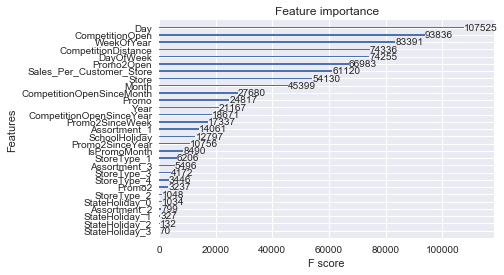

In [60]:
xgb.plot_importance(gbm)

### 7.参考文献，进一步对数据预处理和特征工程

In [61]:
#参考获奖选手的文献

### 8.对xgboost进行参数调整

In [62]:
#参考machinelearning mastery的文献

### 9.根据报告要求，补充完成数据分析和结果阐述

## 第三步. 撰写报告

### 1.撰写报告，并提交